In [53]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [26]:
df_repeater=pd.read_csv("../Processed Data/prd_loyal_customers_ordervalue.csv")

In [54]:
df_repeater

,customer_id,order_id,order_purchase_timestamp,snapshot_date,is_repeat_customer,past_order_count,days_since_last_order,is_first_order,customer_unique_id,customer_zip_code_prefix,customer_state,tot_customers_in_zip,tot_sellers_in_zip,n_distinct_categories,main_category,avg_photos_per_product,avg_desc_length,avg_weight,avg_volume,total_price,avg_price,total_freight_value,avg_freight_value,total_order_value,avg_order_value,total_items,review_count,avg_review_score,avg_review_length,has_review_text,pymt_mode_boleto,pymt_mode_credit_card,pymt_mode_debit_card,pymt_mode_not_defined,pymt_mode_voucher,avg_payment_installments,total_payment_installments,total_payment_value,total_lifetime_spend,label_next_order_value,avg_item_price,payment_power,monthly_payment_value,installment_per_item,freight_ratio,cat_spending_potential,price_spread_ratio,weight_spread_ratio,volume_spread_ratio,target_log,price_spread_ratio_log,total_payment_value_log,total_items_log,freight_ratio_log
0,1b4a75b3478138e99902678254b260f4,a61d617fbe5bd006e40d3a0988fc844b,2017-07-27 14:13:03,2017-07-26 14:13:03,0,0,9999,1,004288347e5e88a27ded2bb23747066c,26220,RJ,12.0,0.0,1.0,cool_stuff,1.0,985.0,1625.0,33792.0,229.99,229.99,21.10,21.10,251.09,251.09,1.0,1.0,5.0,39.0,1.0,0.00,251.09,0.0,0.0,0.00,2.0,2.0,251.09,354.37,103.28,229.989770,83.696667,83.696667,1.0,0.091743,119.755,1.0,1.0,1.0,4.647080,0.693147,5.529786,0.693147,0.087776
1,49cf243e0d353cd418ca77868e24a670,90ae229a4addcfead792e2564554f09c,2017-09-01 12:11:23,2017-08-31 12:11:23,0,0,9999,1,004b45ec5c64187465168251cd1c9c2f,57055,AL,7.0,0.0,1.0,garden_tools,2.0,341.0,1850.0,32560.0,59.90,59.90,37.97,37.97,97.87,97.87,1.0,1.0,1.0,198.0,1.0,97.87,0.00,0.0,0.0,0.00,1.0,1.0,97.87,147.72,49.85,59.899940,48.935000,48.935000,0.5,0.633890,118.820,1.0,1.0,1.0,3.928880,0.693147,4.593806,0.693147,0.490964
2,876356df457f952458a764348e1858bc,7d32c87acba91ed87ebd98310fe1c54d,2018-05-23 20:14:21,2018-05-22 20:14:21,0,0,9999,1,00a39521eb40f7012db50455bf083460,72595,DF,3.0,0.0,1.0,sports_leisure,1.0,1176.0,2200.0,1936.0,69.90,69.90,26.57,26.57,96.47,96.47,1.0,1.0,4.0,NaN,0.0,0.00,96.47,0.0,0.0,0.00,1.0,1.0,96.47,123.25,26.78,69.899930,48.235000,48.235000,0.5,0.380114,124.220,1.0,1.0,1.0,3.324316,0.693147,4.579545,0.693147,0.322166
3,c0a44bf37d5601228051fc07852f951f,64307ceb91666760cf3ff463618302fd,2017-03-21 19:25:22,2017-03-20 19:25:22,0,0,9999,1,00cc12a6d8b578b8ebd21ea4e2ae8b27,3178,SP,4.0,2.0,1.0,home_appliances,2.0,385.0,100.0,1976.0,29.90,29.90,14.52,14.52,44.42,44.42,1.0,2.0,4.0,29.0,1.0,44.42,0.00,0.0,0.0,0.00,1.0,1.0,44.42,126.20,81.78,29.899970,22.210000,22.210000,0.5,0.485619,72.820,1.0,1.0,1.0,4.416186,0.693147,3.815953,0.693147,0.395831
4,bc4011fd2a5106761b5ba943c8fbd1b2,0f28d51fdd4828907bdc58b57f672e84,2018-02-17 15:54:49,2018-02-16 15:54:49,0,0,9999,1,011575986092c30523ecb71ff10cb473,30660,MG,15.0,0.0,1.0,toys,5.0,419.0,800.0,3000.0,119.00,119.00,15.58,15.58,134.58,134.58,1.0,1.0,3.0,80.0,1.0,0.00,134.58,0.0,0.0,0.00,2.0,2.0,134.58,214.90,80.32,118.999881,44.860000,44.860000,1.0,0.130924,114.680,1.0,1.0,1.0,4.398392,0.693147,4.909562,0.693147,0.123035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,13bf775a749925a15ef7cc1985b564f1,6ca46f2b9a1592929647682510800e0e,2018-08-24 17:02:19,2018-08-23 17:02:19,0,0,9999,1,ff22e30958c13ffe219db7d711e8f564,2989,SP,6.0,0.0,1.0,kitchen_dining_laundry_garden_furniture,1.0,576.0,10400.0,34816.0,145.00,145.00,21.46,21.46,166.46,166.46,1.0,1.0,1.0,10.0,1.0,0.00,166.46,0.0,0.0,0.00,6.0,6.0,166.46,332.92,166.46,144.999855,23.780000,23.780000,3.0,0.148000,166.460,1.0,1.0,1.0,5.120745,0.693147,5.120745,0.693147,0.138021
2884,5d0c6c3c37720178553332f2509b2568,c087855fe6f303205c09558f7f8103c8,2017-05-19 21:20:54,2017-05-18 21:20:54,0,0,9999,1,ff44401d0d8f5b9c54a47374eb48c1b8,13070,SP,61.0,4.0,1.0,fashion_bags_accessor

In [57]:
# Create specialized regression features
df_repeater['avg_item_price'] = df_repeater['total_price'] / (df_repeater['total_items'] + 1e-6)
df_repeater['payment_power'] = df_repeater['total_payment_value'] / (df_repeater['total_payment_installments'] + 1)


df_repeater["monthly_payment_value"] = df_repeater["total_payment_value"] / (df_repeater["total_payment_installments"] + 1)
df_repeater["installment_per_item"]  = df_repeater["total_payment_installments"] / (df_repeater["total_items"] + 1)
df_repeater["freight_ratio"]         = df_repeater["total_freight_value"] / (df_repeater["total_price"] + eps)

df_repeater["review_value_impact"] = df_repeater["avg_review_score"] * df_repeater["total_price"]
df_repeater["items_per_category"]  = df_repeater["total_items"] / (df_repeater["n_distinct_categories"] + eps)

# Categorical Value Potential (mean of label for each category)
cat_val_map = df_repeater.groupby('main_category')['label_next_order_value'].median().to_dict()
df_repeater['cat_spending_potential'] = df_repeater['main_category'].map(cat_val_map)

df_repeater['growth_target'] = np.log((df_repeater['label_next_order_value'] + 1) / (df_repeater['total_payment_value'] + 1))

In [28]:
eps = 1e-6

df_repeater["price_spread_ratio"]      = df_repeater["max_price"] / (df_repeater["min_price"] + eps)
df_repeater["order_value_spread_ratio"]= df_repeater["max_order_value"] / (df_repeater["min_order_value"] + eps)

df_repeater["weight_spread_ratio"]     = df_repeater["max_weight"] / (df_repeater["avg_weight"] + eps)   # since no min_weight
df_repeater["volume_spread_ratio"]     = df_repeater["max_volume"] / (df_repeater["avg_volume"] + eps)

In [29]:
for c in ["price_spread_ratio","order_value_spread_ratio","weight_spread_ratio","volume_spread_ratio"]:
    df_repeater[c] = df_repeater[c].clip(upper=50)  

In [30]:
drop_cols = [        
    'customer_city', 'geolocation_lat', 'geolocation_lng',
    'is_latlng_missing', 'max_weight',    
    'max_volume',        
    'min_price',           
    'max_price', 'min_order_value',  
    'max_order_value', 'max_order_value',
    'max_weight', 'max_volume', 
    'min_items', 'max_items', 
    'min_review_score', 'max_review_score'
]


df_repeater=df_repeater.drop(columns=drop_cols, errors='ignore')

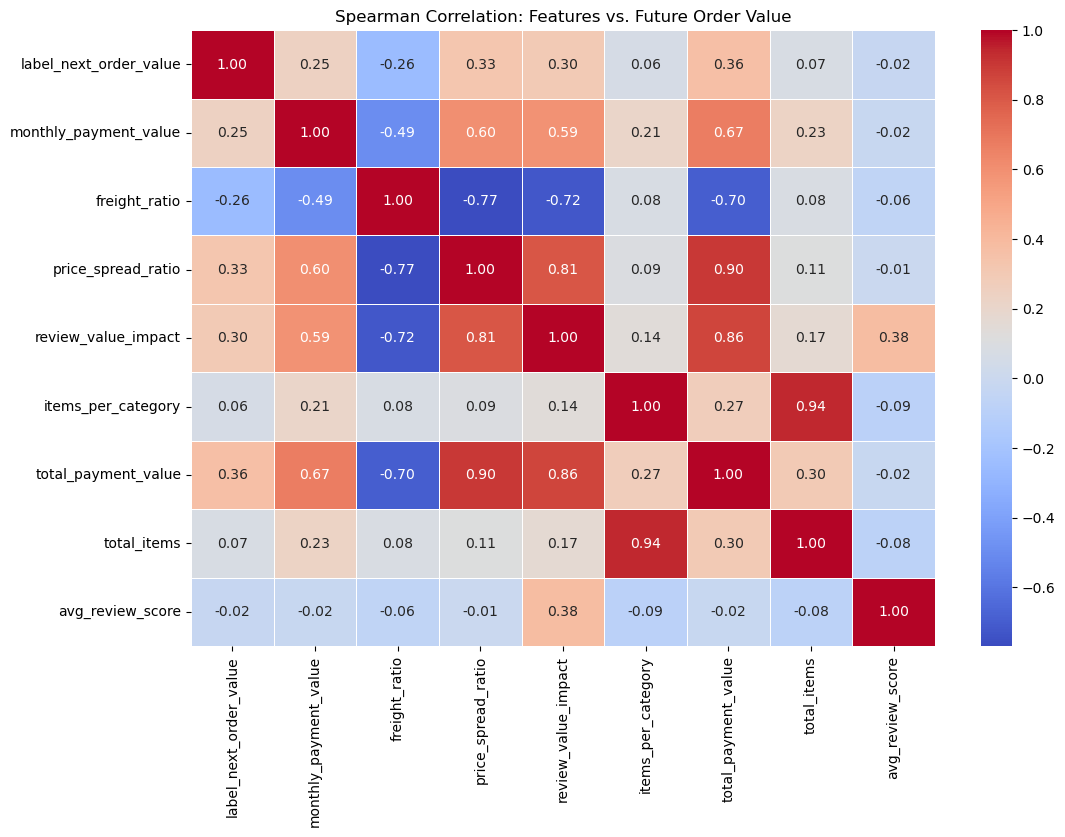

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features we just built plus the target
features_to_check = [
    'label_next_order_value', 'monthly_payment_value', 'freight_ratio', 
    'price_spread_ratio', 'review_value_impact', 'items_per_category',
    'total_payment_value', 'total_items', 'avg_review_score'
]

# Calculate Spearman Correlation
corr_matrix = df_repeater[features_to_check].corr(method='spearman')

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation: Features vs. Future Order Value")
plt.show()

In [ ]:
can remove 
 1) items per category, total items 
 2) total_items and items per category
 3)
 price spread ratio total payment value
 review value impact and price spread ratio
 freight and price spread ratio

In [33]:
drop_cols = [        
    'items_per_category','review_value_impact','order_value_spread_ratio'
]


df_repeater=df_repeater.drop(columns=drop_cols, errors='ignore')

In [48]:
df_repeater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 2888 non-null   object 
 1   order_id                    2888 non-null   object 
 2   order_purchase_timestamp    2888 non-null   object 
 3   snapshot_date               2888 non-null   object 
 4   is_repeat_customer          2888 non-null   int64  
 5   past_order_count            2888 non-null   int64  
 6   days_since_last_order       2888 non-null   int64  
 7   is_first_order              2888 non-null   int64  
 8   customer_unique_id          2888 non-null   object 
 9   customer_zip_code_prefix    2888 non-null   int64  
 10  customer_state              2888 non-null   object 
 11  tot_customers_in_zip        2888 non-null   float64
 12  tot_sellers_in_zip          2888 non-null   float64
 13  n_distinct_categories       2887 

In [52]:
df_repeater['past_order_count'].unique()

array([0])

In [ ]:
past_order_count

In [32]:
# The 'index' should now contain all of these
features_to_check = [
    'label_next_order_value', 
    'monthly_payment_value', 
    'freight_ratio', 
    'price_spread_ratio', 
    'review_value_impact', 
    'total_payment_value', 
    'total_items', 
    'avg_review_score'
]

# Using spearman because it's robust to the outliers in 'total_payment_value'
corr_results = df_repeater[features_to_check].corr(method='spearman')['label_next_order_value'].sort_values(ascending=False)

print("Correlation with Future Order Value:")
print(corr_results)

Correlation with Future Order Value:
label_next_order_value    1.000000
total_payment_value       0.364434
price_spread_ratio        0.329161
review_value_impact       0.299651
monthly_payment_value     0.246202
total_items               0.074687
avg_review_score         -0.022629
freight_ratio            -0.256184
Name: label_next_order_value, dtype: float64


In [34]:
# The lean, high-signal list
lean_features = [
    'label_next_order_value', # Target
    'total_payment_value', 
    'price_spread_ratio', 
    'freight_ratio', 
    'total_items', 
    'avg_review_score'
]

skew_report = df_repeater[lean_features].skew().sort_values(ascending=False)
print("Skewness Report:")
print(skew_report)

Skewness Report:
price_spread_ratio        16.572342
total_payment_value        9.429151
total_items                6.709633
label_next_order_value     5.332661
freight_ratio              4.078178
avg_review_score          -1.482828
dtype: float64


In [35]:
import numpy as np

# Create the transformed features
# We use log1p because it handles 0s gracefully (log(1+0) = 0)
df_repeater['target_log'] = np.log1p(df_repeater['label_next_order_value'])

# Log the predictors
to_log = ['price_spread_ratio', 'total_payment_value', 'total_items', 'freight_ratio']
for col in to_log:
    df_repeater[f'{col}_log'] = np.log1p(df_repeater[col])

# Check the new skewness of the log-transformed target
print(f"New Target Skew: {df_repeater['target_log'].skew():.2f}")

New Target Skew: 0.42


In [37]:
# 1. Fill NaNs in categorical feature
df_repeater['main_category'] = df_repeater['main_category'].fillna("missing").astype(str)

# 2. Fill NaNs in numerical features (using median is safest for skewed data)
num_features = ['price_spread_ratio_log', 'total_payment_value_log', 
                'total_items_log', 'freight_ratio_log', 'avg_review_score']

for col in num_features:
    df_repeater[col] = df_repeater[col].fillna(df_repeater[col].median())

# 3. Re-assign X and y
X = df_repeater[[
    'price_spread_ratio_log', 'total_payment_value_log', 
    'total_items_log', 'freight_ratio_log', 
    'avg_review_score', 'main_category'
]]
y = df_repeater['target_log']

# 4. Re-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from catboost import CatBoostRegressor

reg_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    loss_function='MAE', 
    cat_features=['main_category'],
    verbose=100
)

reg_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

0:	learn: 0.6343524	test: 0.6412180	best: 0.6412180 (0)	total: 60.8ms	remaining: 1m
100:	learn: 0.5585802	test: 0.5854945	best: 0.5852288 (94)	total: 142ms	remaining: 1.26s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.584842321
bestIteration = 107

Shrink model to first 108 iterations.


In [39]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Get predictions in Log space
preds_log = reg_model.predict(X_test)

# 2. Inverse Transform to Dollars
preds_dollars = np.expm1(preds_log)
actual_dollars = np.expm1(y_test)

# 3. Final Evaluation
mae_dollars = mean_absolute_error(actual_dollars, preds_dollars)
r2 = r2_score(y_test, preds_log) # R2 is usually calculated in the space you trained in

print(f"--- Final Regression Results ---")
print(f"Mean Absolute Error: ${mae_dollars:.2f}")
print(f"R2 Score (Log-Space): {r2:.4f}")

--- Final Regression Results ---
Mean Absolute Error: $94.27
R2 Score (Log-Space): 0.0998


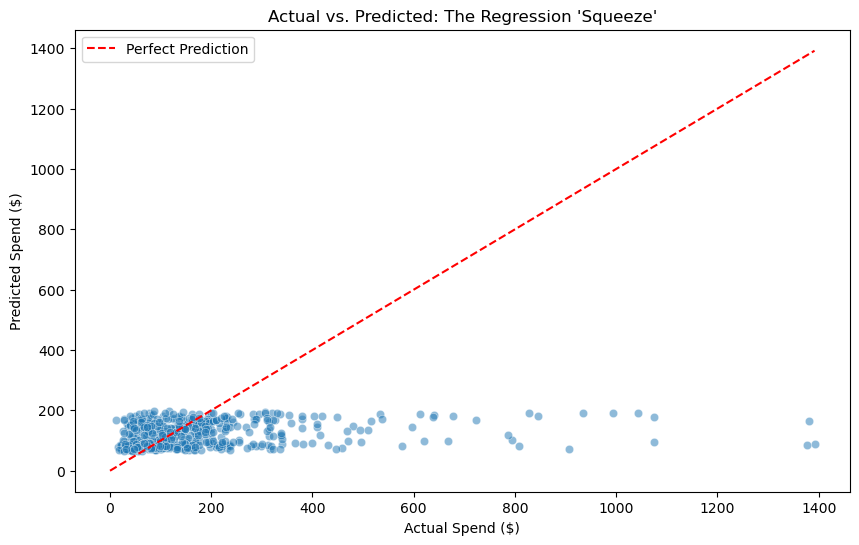

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=actual_dollars, y=preds_dollars, alpha=0.5)
plt.plot([0, actual_dollars.max()], [0, actual_dollars.max()], '--r', label='Perfect Prediction')
plt.xlabel("Actual Spend ($)")
plt.ylabel("Predicted Spend ($)")
plt.title("Actual vs. Predicted: The Regression 'Squeeze'")
plt.legend()
plt.show()

In [41]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Define a helper to evaluate
def evaluate_reg_model(model, X_test, y_test, name):
    log_preds = model.predict(X_test)
    # Inverse transform to actual dollars
    actual_dollars = np.expm1(y_test)
    pred_dollars = np.expm1(log_preds)
    
    mae = mean_absolute_error(actual_dollars, pred_dollars)
    r2 = r2_score(y_test, log_preds)
    return {"Model": name, "MAE ($)": round(mae, 2), "R2 (Log)": round(r2, 4)}

# Note: We need to handle the categorical 'main_category' for Lasso and RF
# CatBoost handled it natively, but for these we need One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=['main_category'], drop_first=True)
X_train_e, X_test_e, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize Models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "Lasso (Linear)": Lasso(alpha=0.01),
    "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.05, objective='reg:squarederror')
}

results = []
for name, model in models.items():
    model.fit(X_train_e, y_train)
    results.append(evaluate_reg_model(model, X_test_e, y_test, name))

# Add our previous CatBoost result for comparison
results.append({"Model": "CatBoost", "MAE ($)": 94.27, "R2 (Log)": 0.0998})

# Show Comparison Table
performance_df = pd.DataFrame(results).sort_values(by="MAE ($)")
print(performance_df)

            Model  MAE ($)  R2 (Log)
1  Lasso (Linear)    92.65    0.1630
3        CatBoost    94.27    0.0998
0   Random Forest    97.70    0.0624
2         XGBoost   105.50   -0.0512


In [42]:
from sklearn.linear_model import LassoCV

# LassoCV automatically finds the best alpha using cross-validation
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50), cv=5, max_iter=10000)
lasso_cv.fit(X_train_e, y_train)

print(f"Optimal Alpha: {lasso_cv.alpha_}")

# Evaluate the optimized model
best_lasso_preds = lasso_cv.predict(X_test_e)
mae_final = mean_absolute_error(np.expm1(y_test), np.expm1(best_lasso_preds))
r2_final = r2_score(y_test, best_lasso_preds)

print(f"Optimized Lasso MAE: ${mae_final:.2f}")
print(f"Optimized Lasso R2: {r2_final:.4f}")

Optimal Alpha: 0.010985411419875584
Optimized Lasso MAE: $92.68
Optimized Lasso R2: 0.1627


In [43]:
coef_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': lasso_cv.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Top Value Drivers according to Lasso:")
print(coef_df.head(10))

Top Value Drivers according to Lasso:
                                              Feature  Coefficient
1                             total_payment_value_log     0.358987
43                        main_category_health_beauty    -0.000000
49                           main_category_housewares     0.000000
48                    main_category_home_construction    -0.000000
47                         main_category_home_confort    -0.000000
46                       main_category_home_comfort_2     0.000000
45                    main_category_home_appliances_2    -0.000000
44                      main_category_home_appliances    -0.000000
42                         main_category_garden_tools    -0.000000
51  main_category_kitchen_dining_laundry_garden_fu...     0.000000


In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2310 entries, 1427 to 860
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_spread_ratio_log   2310 non-null   float64
 1   total_payment_value_log  2310 non-null   float64
 2   total_items_log          2310 non-null   float64
 3   freight_ratio_log        2310 non-null   float64
 4   avg_review_score         2310 non-null   float64
 5   main_category            2310 non-null   object 
dtypes: float64(5), object(1)
memory usage: 126.3+ KB


In [55]:
# Check if the features and the label are the same (which would be bad!)
comparison = df_repeater[['total_payment_value', 'label_next_order_value']].sample(5)
print("Check: Are features different from labels?")
print(comparison)

Check: Are features different from labels?
      total_payment_value  label_next_order_value
419                 39.75                   39.75
2857               220.82                  358.29
1452               117.44                  164.04
1664                64.10                   95.40
515                187.43                   97.80


In [56]:
# Assuming lasso_cv is your trained model from earlier
importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Weight': lasso_cv.coef_
})

# Sort by absolute impact
importance['Abs_Weight'] = importance['Weight'].abs()
importance = importance.sort_values(by='Abs_Weight', ascending=False)

print("Top 10 Drivers of Future Order Value:")
print(importance[['Feature', 'Weight']].head(10))

Top 10 Drivers of Future Order Value:
                                         Feature    Weight
1                        total_payment_value_log  0.358987
4                               avg_review_score -0.002310
44                 main_category_home_appliances -0.000000
50  main_category_industry_commerce_and_business -0.000000
49                      main_category_housewares  0.000000
48               main_category_home_construction -0.000000
47                    main_category_home_confort -0.000000
46                  main_category_home_comfort_2  0.000000
45               main_category_home_appliances_2 -0.000000
43                   main_category_health_beauty -0.000000


In [59]:
# Use the same lean features, but with the new growth_target
y_growth = df_repeater['growth_target']
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_encoded, y_growth, test_size=0.2, random_state=42)

# Lasso is still our best bet for finding signal in noise
growth_lasso = LassoCV(cv=5).fit(X_train_g, y_train_g)

# Check Coefficients
growth_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Weight': growth_lasso.coef_
}).sort_values(by='Weight', key=abs, ascending=False)

print("What drives Spending GROWTH?")
print(growth_importance.head(10))

What drives Spending GROWTH?
                                         Feature    Weight
1                        total_payment_value_log -0.602280
4                               avg_review_score -0.000936
44                 main_category_home_appliances -0.000000
50  main_category_industry_commerce_and_business -0.000000
49                      main_category_housewares  0.000000
48               main_category_home_construction -0.000000
47                    main_category_home_confort -0.000000
46                  main_category_home_comfort_2  0.000000
45               main_category_home_appliances_2 -0.000000
43                   main_category_health_beauty -0.000000


In [61]:
growth_preds = growth_lasso.predict(X_test_e)
growth_r2 = r2_score(y_test_g, growth_preds)
print(f"Growth Model R2: {growth_r2:.4f}")

Growth Model R2: 0.2855


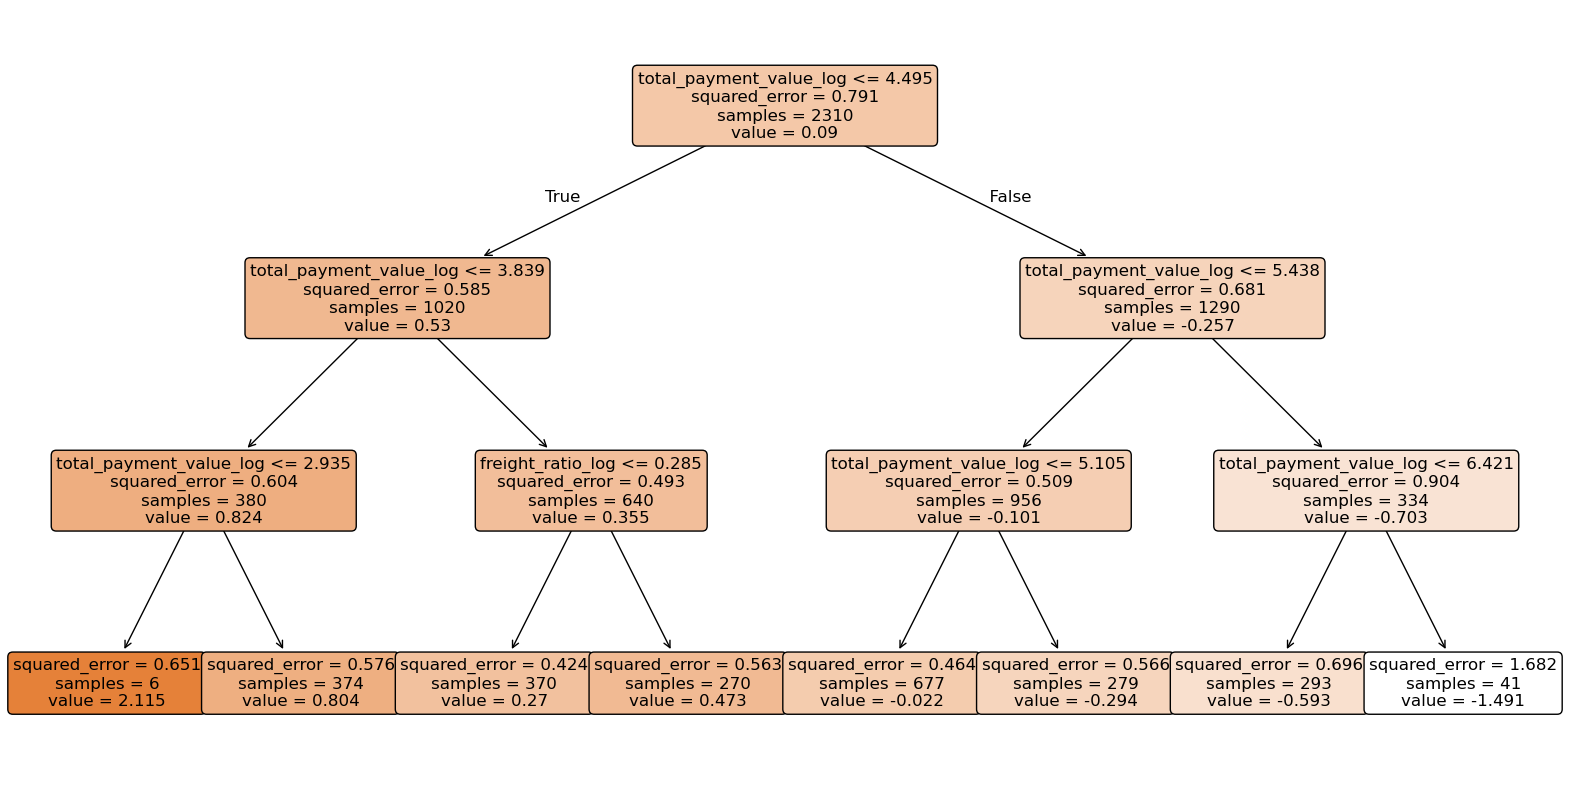

In [62]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# We use a shallow depth so the rules are readable
growth_tree = DecisionTreeRegressor(max_depth=3)
growth_tree.fit(X_train_e, y_train_g)

# Visualize the rules
plt.figure(figsize=(20,10))
plot_tree(growth_tree, feature_names=X_encoded.columns, filled=True, rounded=True, fontsize=12)
plt.show()

In [63]:
# Convert growth predictions back to dollars
# Growth_Pred = ln(Next/Prev) -> Next = Prev * exp(Growth_Pred)
growth_preds_test = growth_lasso.predict(X_test_e)
# We use the raw 'total_payment_value' from the test set
prev_spend_test = np.expm1(X_test_e['total_payment_value_log'])
final_dollar_preds = prev_spend_test * np.exp(growth_preds_test)

actual_dollars = np.expm1(y_test)
new_mae = mean_absolute_error(actual_dollars, final_dollar_preds)

print(f"New Growth-Based MAE: ${new_mae:.2f}")

New Growth-Based MAE: $92.03
